In [68]:
# pip install pm4py

In [66]:
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.util import dataframe_utils

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
#from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

In [70]:
dataframe = pd.read_csv(r'C:\Users\HP\Downloads\Production_Data.csv')
dataframe.head(7)

,Case ID,Activity,Resource,Start Timestamp,Complete Timestamp,Span,Work Order Qty,Part Desc.,Worker ID,Report Type,Qty Completed,Qty Rejected,Qty for MRB,Rework
0,Case 1,Turning & Milling - Machine 4,Machine 4 - Turning & Milling,2012/01/29 23:24:00.000,2012/01/30 05:43:00.000,006:19,10,Cable Head,ID4932,S,1,0,0,NaN
1,Case 1,Turning & Milling - Machine 4,Machine 4 - Turning & Milling,2012/01/30 05:44:00.000,2012/01/30 06:42:00.000,000:58,10,Cable Head,ID4932,D,1,0,0,NaN
2,Case 1,Turning & Milling - Machine 4,Machine 4 - Turning & Milling,2012/01/30 06:59:00.000,2012/01/30 07:21:00.000,000:22,10,Cable Head,ID4167,S,0,0,0,NaN
3,Case 1,Turning & Milling - Machine 4,Machine 4 - Turning & Milling,2012/01/30 07:21:00.000,2012/01/30 10:58:00.000,003:37,10,Cable Head,ID4167,D,8,0,0,NaN
4,Case 1,Turning & Milling Q.C.,Quality Check 1,2012/01/31 13:20:00.000,2012/01/31 14:50:00.000,001:30,10,Cable Head,ID4163,D,9,1,0,NaN
5,Case 1,Laser Marking - Machine 7,Machine 7- Laser Marking,2012/02/01 08:18:00.000,2012/02/01 08:27:00.000,000:09,10,Cable Head,ID0998,D,9,0,0,NaN
6,Case 1,Lapping - Machine 1,Machine 1 - Lapping,2012/02/14 00:00:00.000,2012/02/14 01:15:00.000,000:00,10,Cable Head,ID4882,D,0,0,0,NaN


In [3]:
log = pm4py.read_xes(r'F:\F1\Project\exported.xes')

parsing log, completed traces ::   0%|          | 0/225 [00:00<?, ?it/s]

In [4]:
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(log)

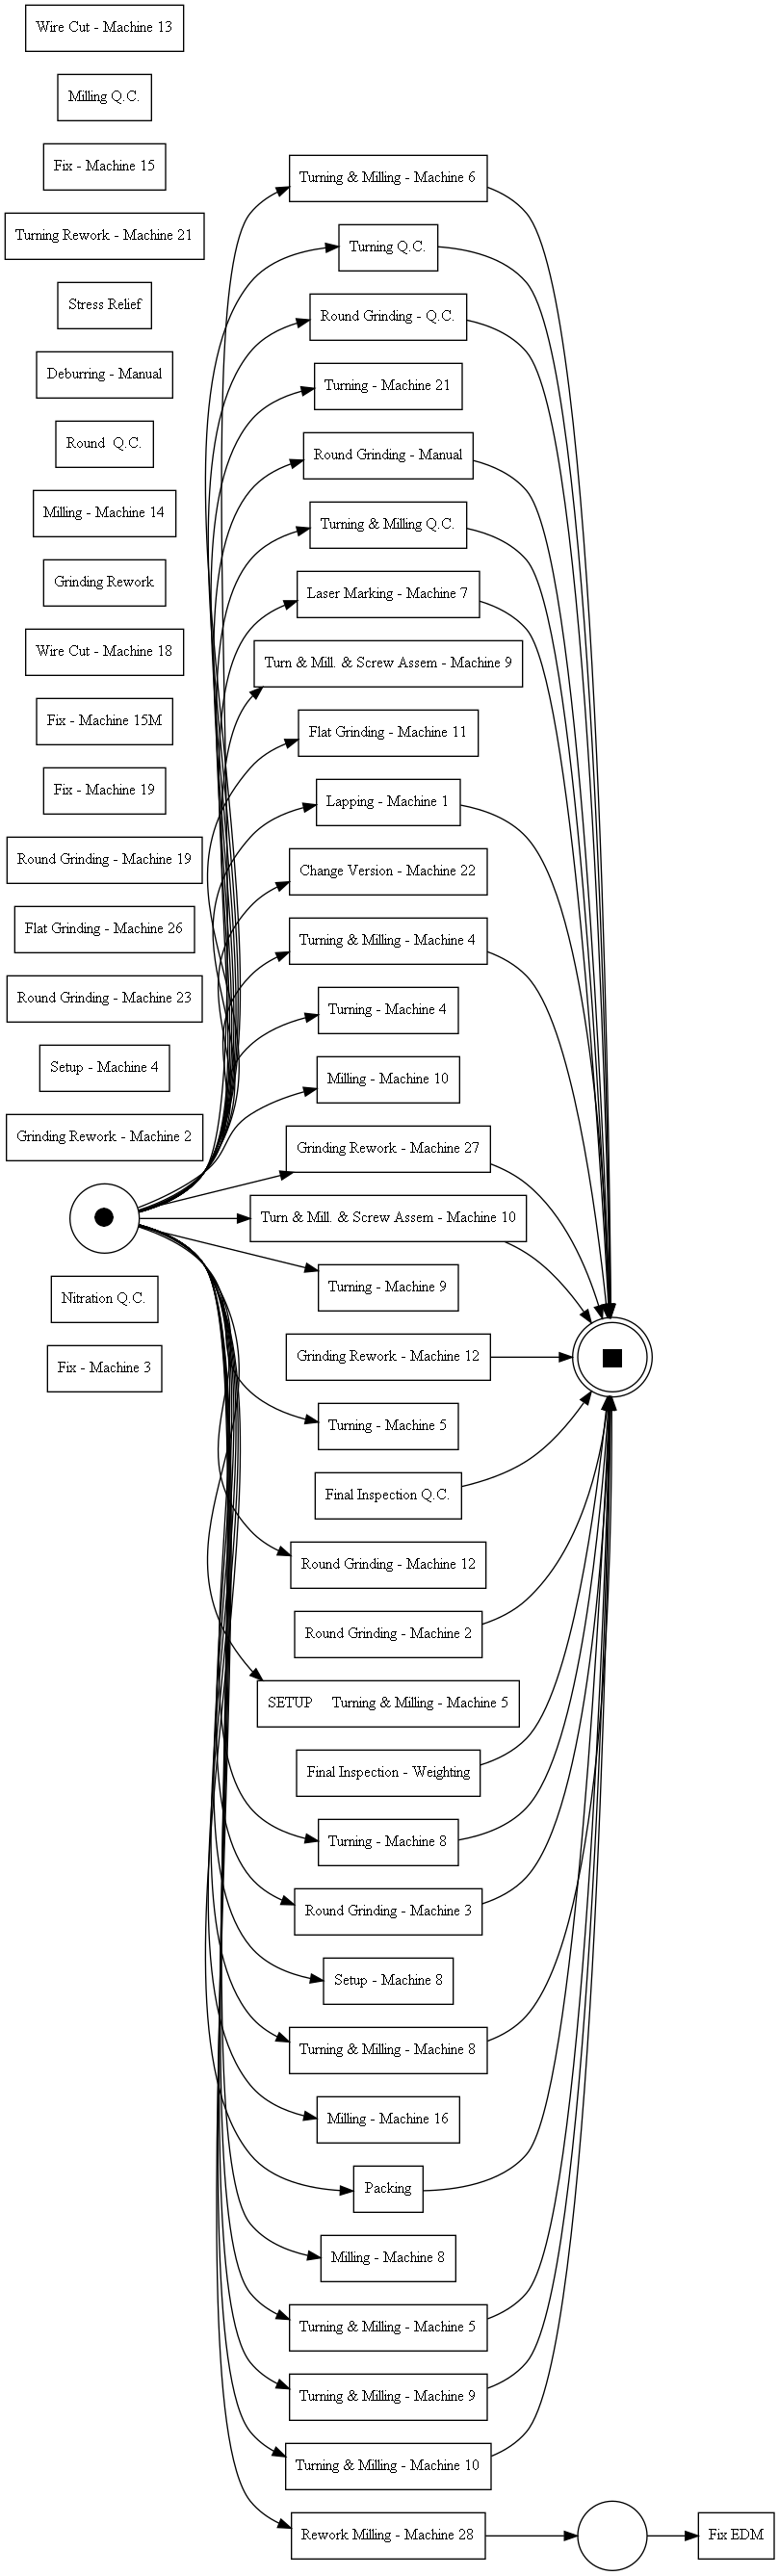

In [5]:
# viz
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)
pn_visualizer.save(gviz,"Dig1.png")

,Case ID,Activity,Resource,Start Timestamp,Complete Timestamp,Span,Work Order Qty,Part Desc.,Worker ID,Report Type,Qty Completed,Qty Rejected,Qty for MRB,Rework
0,Case 1,Turning & Milling - Machine 4,Machine 4 - Turning & Milling,2012/01/29 23:24:00.000,2012/01/30 05:43:00.000,006:19,10,Cable Head,ID4932,S,1,0,0,NaN
1,Case 1,Turning & Milling - Machine 4,Machine 4 - Turning & Milling,2012/01/30 05:44:00.000,2012/01/30 06:42:00.000,000:58,10,Cable Head,ID4932,D,1,0,0,NaN
2,Case 1,Turning & Milling - Machine 4,Machine 4 - Turning & Milling,2012/01/30 06:59:00.000,2012/01/30 07:21:00.000,000:22,10,Cable Head,ID4167,S,0,0,0,NaN
3,Case 1,Turning & Milling - Machine 4,Machine 4 - Turning & Milling,2012/01/30 07:21:00.000,2012/01/30 10:58:00.000,003:37,10,Cable Head,ID4167,D,8,0,0,NaN
4,Case 1,Turning & Milling Q.C.,Quality Check 1,2012/01/31 13:20:00.000,2012/01/31 14:50:00.000,001:30,10,Cable Head,ID4163,D,9,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,Case 99,Laser Marking - Machine 7,Machine 7- Laser Marking,2012/03/26 09:14:00.000,2012/03/26 10:12:00.000,000:58,507,Drill,ID0998,D,160,0,0,NaN
4539,Case 99,Lapping - Machine 1,Machine 1 - Lapping,2012/03/26 10:12:00.000,2012/03/26 12:12:00.000,002:00,507,Drill,ID0998,D,160,0,0,NaN
4540,Case 99,Final Inspection Q.C.,Quality Check 1,2012/03/28 17:35:00.000,2012/03/28 17:59:00.000,000:24,507,Drill,ID4618,D,0,0,0,NaN
4541,Case 99,Final Inspection Q.C.,Quality Check 1,2012/03/29 08:00:00.000,2012/03/29 11:54:00.000,003:54,507,Drill,ID4618,D,160,0,0,NaN


In [7]:
for i in dataframe.columns:
    cn = i
    i = i.replace(" ","")
    i = i.replace(".","")
    dataframe.rename(columns={cn:i},inplace=True)

In [8]:
df = dataframe[dataframe['CaseID']=='Case 1']

In [9]:
df = df.rename(columns={'WorkerID': 'case:WorkerID'})
df = pm4py.format_dataframe(df, case_id='CaseID', activity_key='Activity', timestamp_key='StartTimestamp')
log = pm4py.convert_to_event_log(df)

In [10]:
pm4py.write_xes(log, 'Case1.xes')

exporting log, completed traces ::   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(log)

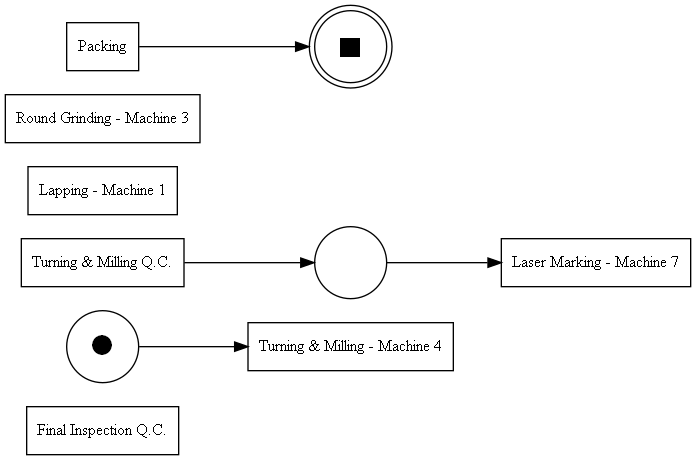

In [12]:
# viz
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)
pn_visualizer.save(gviz,"Case1alpha.png")

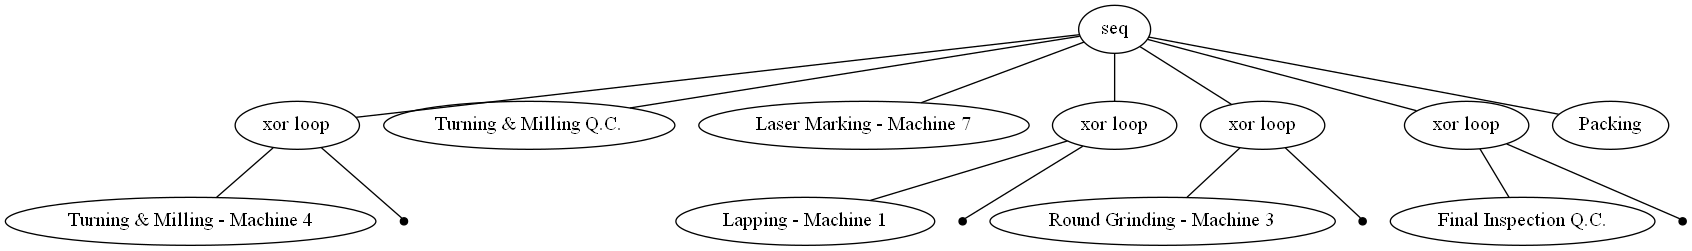

In [13]:
#Inductive Miner
if __name__ == "__main__":
    tree = pm4py.discover_process_tree_inductive(log)

    pm4py.view_process_tree(tree)

In [14]:
## tree
if __name__ == "__main__":
    net, initial_marking, final_marking = pm4py.convert_to_petri_net(tree)

In [15]:
if __name__ == "__main__":
    heu_net = pm4py.discover_heuristics_net(log)

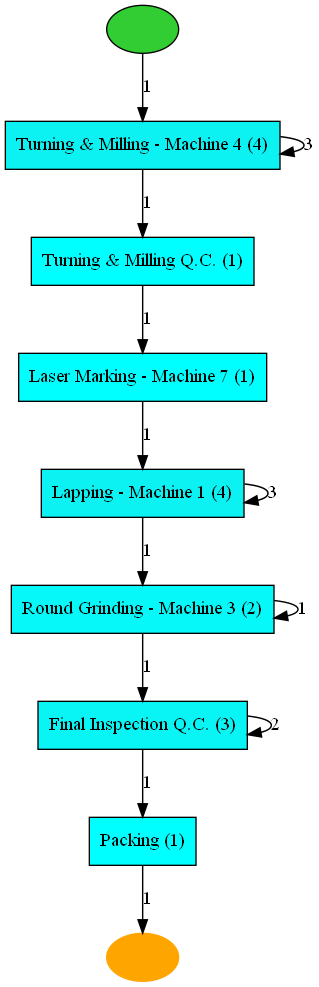

In [16]:
if __name__ == "__main__":
    pm4py.view_heuristics_net(heu_net)

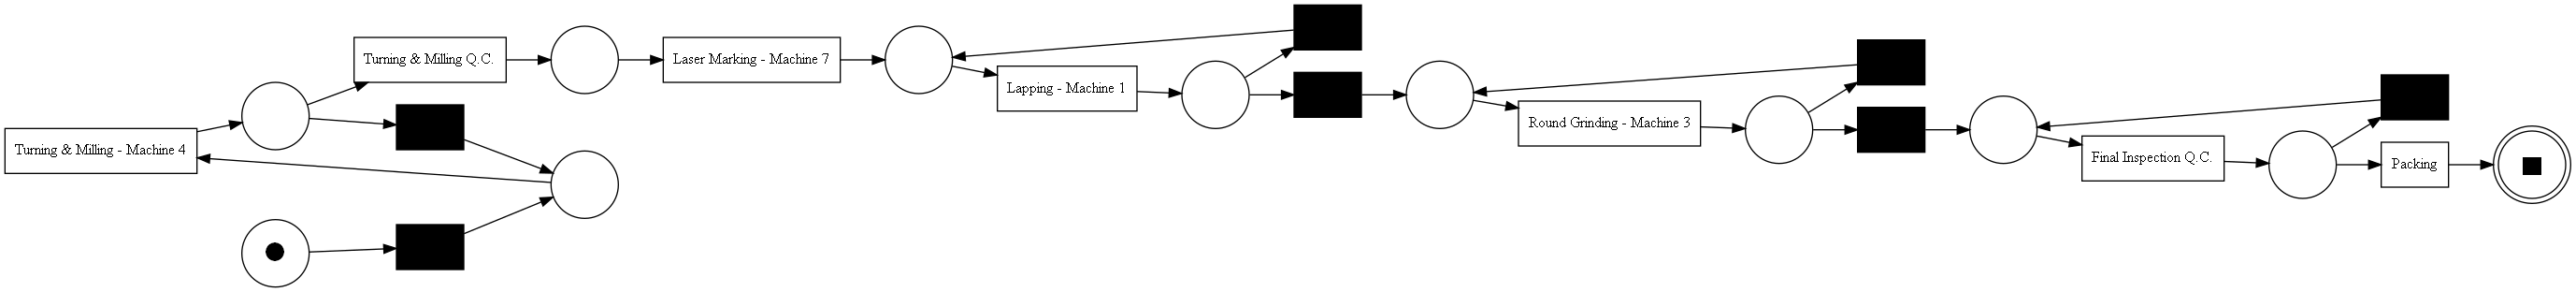

In [17]:
#Heuristic Miner
if __name__ == "__main__":
    net, im, fm = pm4py.discover_petri_net_heuristics(log)

    pm4py.view_petri_net(net, im, fm)

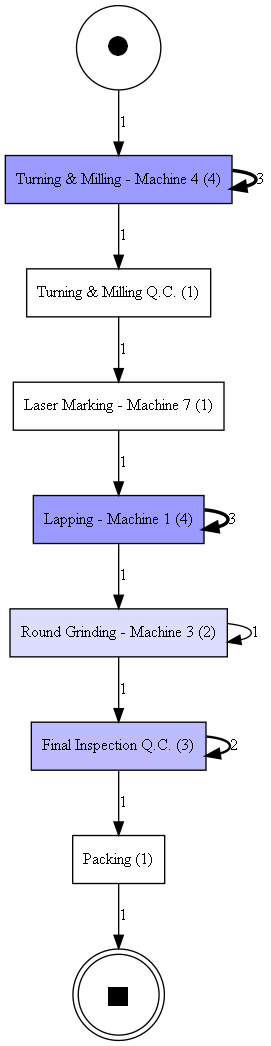

In [18]:
if __name__ == "__main__":
    #log = pm4py.read_xes(os.path.join("tests","input_data","running-example.xes"))
    dfg, start_activities, end_activities = pm4py.discover_dfg(log)
    pm4py.view_dfg(dfg, start_activities, end_activities)

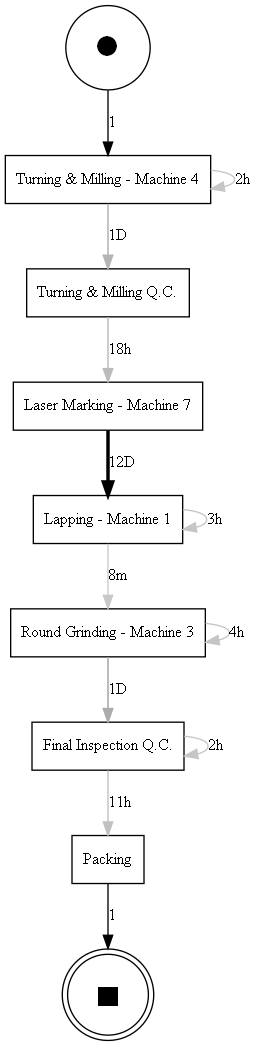

In [19]:
if __name__ == "__main__":
    #log = pm4py.read_xes(os.path.join("tests","input_data","running-example.xes"))
    performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(log)
    pm4py.view_performance_dfg(performance_dfg, start_activities, end_activities)

In [20]:
if __name__ == "__main__":
    parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
    gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log)
    pn_visualizer.save(gviz, "inductive_frequency.png")

In [21]:
from pm4py.algo.discovery.correlation_mining import algorithm as correlation_miner

if __name__ == "__main__":
    frequency_dfg, performance_dfg = correlation_miner.apply(df, parameters={"pm4py:param:activity_key": "concept:name",
                                    "pm4py:param:timestamp_key": "time:timestamp"})

In [22]:
if __name__ == "__main__":
    activities_freq = dict(df["concept:name"].value_counts())

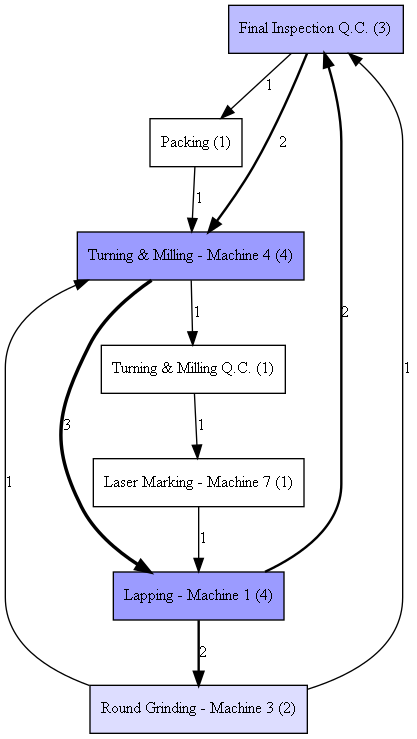

In [23]:
from pm4py.visualization.dfg import visualizer as dfg_visualizer

if __name__ == "__main__":
    gviz_freq = dfg_visualizer.apply(frequency_dfg, variant=dfg_visualizer.Variants.FREQUENCY, activities_count=activities_freq, parameters={"format": "png"})
    gviz_perf = dfg_visualizer.apply(performance_dfg, variant=dfg_visualizer.Variants.PERFORMANCE, activities_count=activities_freq, parameters={"format": "png"})
    dfg_visualizer.view(gviz_freq)
    #dfg_visualizer.view(gviz_perf)

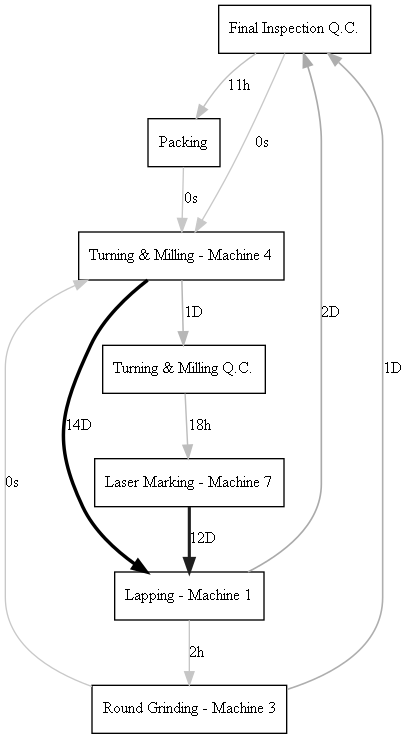

In [24]:
dfg_visualizer.view(gviz_perf)

In [25]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log)
aligned_traces = pm4py.conformance_diagnostics_alignments(log, net, initial_marking, final_marking)

In [26]:
aligned_traces

[{'alignment': [('>>', None),
   ('Turning & Milling - Machine 4', 'Turning & Milling - Machine 4'),
   ('>>', None),
   ('Turning & Milling - Machine 4', 'Turning & Milling - Machine 4'),
   ('>>', None),
   ('Turning & Milling - Machine 4', 'Turning & Milling - Machine 4'),
   ('>>', None),
   ('Turning & Milling - Machine 4', 'Turning & Milling - Machine 4'),
   ('Turning & Milling Q.C.', 'Turning & Milling Q.C.'),
   ('Laser Marking - Machine 7', 'Laser Marking - Machine 7'),
   ('Lapping - Machine 1', 'Lapping - Machine 1'),
   ('>>', None),
   ('Lapping - Machine 1', 'Lapping - Machine 1'),
   ('>>', None),
   ('Lapping - Machine 1', 'Lapping - Machine 1'),
   ('>>', None),
   ('Lapping - Machine 1', 'Lapping - Machine 1'),
   ('>>', None),
   ('Round Grinding - Machine 3', 'Round Grinding - Machine 3'),
   ('>>', None),
   ('Round Grinding - Machine 3', 'Round Grinding - Machine 3'),
   ('>>', None),
   ('Final Inspection Q.C.', 'Final Inspection Q.C.'),
   ('>>', None),
   ('Fi

In [30]:
filtered_log = pm4py.filter_case_size(log,5,10)

In [31]:
filtered_log

[{'attributes': {'WorkerID': 'ID4529', 'concept:name': 'Case 104'}, 'events': [{'CaseID': 'Case 104', 'Activity': 'Turning & Milling - Machine 5', 'Resource': 'Machine 5 - Turning & Milling', 'StartTimestamp': datetime.datetime(2012, 3, 19, 20, 43, tzinfo=datetime.timezone.utc), 'CompleteTimestamp': datetime.datetime(2012, 3, 20, 2, 26, tzinfo=datetime.timezone.utc), 'Span': '005:43', 'WorkOrderQty': 33, 'PartDesc': 'Cable Head', 'ReportType': 'S', 'QtyCompleted': 1, 'QtyRejected': 0, 'QtyforMRB': 0, 'Rework': nan, 'concept:name': 'Turning & Milling - Machine 5', 'time:timestamp': datetime.datetime(2012, 3, 19, 20, 43, tzinfo=datetime.timezone.utc), '@@index': 120}, '..', {'CaseID': 'Case 104', 'Activity': 'Laser Marking - Machine 7', 'Resource': 'Machine 7- Laser Marking', 'StartTimestamp': datetime.datetime(2012, 3, 21, 9, 21, tzinfo=datetime.timezone.utc), 'CompleteTimestamp': datetime.datetime(2012, 3, 21, 9, 49, tzinfo=datetime.timezone.utc), 'Span': '000:28', 'WorkOrderQty': 33, 

In [56]:
log = pm4py.read_xes(r'F:\F1\Project\exported.xes')

parsing log, completed traces ::   0%|          | 0/225 [00:00<?, ?it/s]

In [62]:
log = pm4py.read_xes(r'F:\F1\Project\Case1.xes')

parsing log, completed traces ::   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
if __name__ == "__main__":
    for trace in log:
         for event in trace:
            event["customClassifier"] = event["concept:name"] + event["concept:name"]

In [35]:
# define the activity key in the parameters
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments
from pm4py.objects.conversion.process_tree import converter as process_tree_converter
parameters = {"pm4py:param:activity_key": "customClassifier"}

In [36]:
from pm4py.algo.discovery.log_skeleton import algorithm as lsk_discovery
if __name__ == "__main__":
    skeleton = lsk_discovery.apply(log, parameters={lsk_discovery.Variants.CLASSIC.value.Parameters.NOISE_THRESHOLD: 0.0})

In [37]:
skeleton

{'equivalence': {('Lapping - Machine 1', 'Turning & Milling - Machine 4'),
  ('Laser Marking - Machine 7', 'Packing'),
  ('Laser Marking - Machine 7', 'Turning & Milling Q.C.'),
  ('Packing', 'Laser Marking - Machine 7'),
  ('Packing', 'Turning & Milling Q.C.'),
  ('Turning & Milling - Machine 4', 'Lapping - Machine 1'),
  ('Turning & Milling Q.C.', 'Laser Marking - Machine 7'),
  ('Turning & Milling Q.C.', 'Packing')},
 'always_after': {('Final Inspection Q.C.', 'Final Inspection Q.C.'),
  ('Final Inspection Q.C.', 'Packing'),
  ('Lapping - Machine 1', 'Final Inspection Q.C.'),
  ('Lapping - Machine 1', 'Lapping - Machine 1'),
  ('Lapping - Machine 1', 'Packing'),
  ('Lapping - Machine 1', 'Round Grinding - Machine 3'),
  ('Laser Marking - Machine 7', 'Final Inspection Q.C.'),
  ('Laser Marking - Machine 7', 'Lapping - Machine 1'),
  ('Laser Marking - Machine 7', 'Packing'),
  ('Laser Marking - Machine 7', 'Round Grinding - Machine 3'),
  ('Round Grinding - Machine 3', 'Final Inspecti

In [38]:
net, im, fm = pm4py.discover_petri_net_inductive(log)

In [39]:
if __name__ == "__main__":
    simulated_log = pm4py.play_out(net, im, fm)

In [40]:
from pm4py.algo.conformance.alignments.edit_distance import algorithm as logs_alignments
if __name__ == "__main__":
    alignments = logs_alignments.apply(log, simulated_log)

In [41]:
alignments

[{'alignment': [('Turning & Milling - Machine 4',
    'Turning & Milling - Machine 4'),
   ('Turning & Milling - Machine 4', 'Turning & Milling - Machine 4'),
   ('Turning & Milling - Machine 4', 'Turning & Milling - Machine 4'),
   ('Turning & Milling - Machine 4', 'Turning & Milling - Machine 4'),
   ('Turning & Milling Q.C.', 'Turning & Milling Q.C.'),
   ('Laser Marking - Machine 7', 'Laser Marking - Machine 7'),
   ('Lapping - Machine 1', 'Lapping - Machine 1'),
   ('Lapping - Machine 1', 'Lapping - Machine 1'),
   ('Lapping - Machine 1', 'Lapping - Machine 1'),
   ('Lapping - Machine 1', 'Lapping - Machine 1'),
   ('Round Grinding - Machine 3', '>>'),
   ('>>', 'Lapping - Machine 1'),
   ('Round Grinding - Machine 3', 'Round Grinding - Machine 3'),
   ('Final Inspection Q.C.', 'Final Inspection Q.C.'),
   ('Final Inspection Q.C.', 'Final Inspection Q.C.'),
   ('Final Inspection Q.C.', 'Final Inspection Q.C.'),
   ('Packing', 'Packing')],
  'cost': 20000,
  'fitness': 0.9130434782

In [42]:
from pm4py.algo.conformance.alignments.edit_distance import algorithm as logs_alignments
if __name__ == "__main__":
    parameters = {logs_alignments.Variants.EDIT_DISTANCE.value.Parameters.PERFORM_ANTI_ALIGNMENT: True}
    alignments = logs_alignments.apply(log, simulated_log, parameters=parameters)

In [43]:
from pm4py.algo.transformation.log_to_features import algorithm as log_to_features

if __name__ == "__main__":
    data, feature_names = log_to_features.apply(log)
    print(feature_names)

['trace:WorkerID@ID4932', 'event:customClassifier@Final Inspection Q.C.Final Inspection Q.C.', 'event:customClassifier@Lapping - Machine 1Lapping - Machine 1', 'event:customClassifier@Laser Marking - Machine 7Laser Marking - Machine 7', 'event:customClassifier@PackingPacking', 'event:customClassifier@Round Grinding - Machine 3Round Grinding - Machine 3', 'event:customClassifier@Turning & Milling - Machine 4Turning & Milling - Machine 4', 'event:customClassifier@Turning & Milling Q.C.Turning & Milling Q.C.', 'event:CaseID@Case 1', 'event:PartDesc@Cable Head', 'event:Resource@Machine 1 - Lapping', 'event:Resource@Machine 3 - Round Grinding', 'event:Resource@Machine 4 - Turning & Milling', 'event:Resource@Machine 7- Laser Marking', 'event:Resource@Packing', 'event:Resource@Quality Check 1', 'event:concept:name@Final Inspection Q.C.', 'event:concept:name@Lapping - Machine 1', 'event:concept:name@Laser Marking - Machine 7', 'event:concept:name@Packing', 'event:concept:name@Round Grinding - 

In [44]:
from pm4py.objects.log.util import interval_lifecycle
if __name__ == "__main__":
    log = interval_lifecycle.to_interval(log)

In [45]:
from pm4py.objects.log.util import interval_lifecycle
from pm4py.util import constants

if __name__ == "__main__":
    log = interval_lifecycle.assign_lead_cycle_time(log, parameters={
        constants.PARAMETER_CONSTANT_START_TIMESTAMP_KEY: "start_timestamp",
        constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "time:timestamp"})

In [46]:
from pm4py.algo.transformation.log_to_features import algorithm as log_to_features

if __name__ == "__main__":
    data, feature_names = log_to_features.apply(log, parameters={"str_ev_attr": ["concept:name", "org:resource"], "str_tr_attr": [], "num_ev_attr": ["@@approx_bh_partial_cycle_time", "@@approx_bh_partial_lead_time",  "@@approx_bh_overall_wasted_time", "@@approx_bh_this_wasted_time", "@approx_bh_ratio_cycle_lead_time"], "num_tr_attr": [], "str_evsucc_attr": ["concept:name", "org:resource"]})
                                

In [47]:
feature_names

['event:concept:name@Final Inspection Q.C.',
 'event:concept:name@Lapping - Machine 1',
 'event:concept:name@Laser Marking - Machine 7',
 'event:concept:name@Packing',
 'event:concept:name@Round Grinding - Machine 3',
 'event:concept:name@Turning & Milling - Machine 4',
 'event:concept:name@Turning & Milling Q.C.',
 'event:org:resource@UNDEFINED',
 'event:@@approx_bh_partial_cycle_time',
 'event:@@approx_bh_partial_lead_time',
 'event:@@approx_bh_overall_wasted_time',
 'event:@@approx_bh_this_wasted_time',
 'event:@approx_bh_ratio_cycle_lead_time',
 'succession:concept:name@Final Inspection Q.C.#Final Inspection Q.C.',
 'succession:concept:name@Final Inspection Q.C.#Packing',
 'succession:concept:name@Lapping - Machine 1#Lapping - Machine 1',
 'succession:concept:name@Lapping - Machine 1#Round Grinding - Machine 3',
 'succession:concept:name@Laser Marking - Machine 7#Lapping - Machine 1',
 'succession:concept:name@Round Grinding - Machine 3#Final Inspection Q.C.',
 'succession:concept:

In [48]:
if __name__ == "__main__":
    all_case_durations = pm4py.get_all_case_durations(log)

In [49]:
all_case_durations

[1557360.0]

In [50]:
from pm4py.objects.log.util import interval_lifecycle
if __name__ == "__main__":
    enriched_log = interval_lifecycle.assign_lead_cycle_time(log)

In [51]:
enriched_log

[{'attributes': {'WorkerID': 'ID4932', 'concept:name': 'Case 1'}, 'events': [{'CaseID': 'Case 1', 'Activity': 'Turning & Milling - Machine 4', 'Resource': 'Machine 4 - Turning & Milling', 'StartTimestamp': datetime.datetime(2012, 1, 29, 23, 24, tzinfo=datetime.timezone.utc), 'CompleteTimestamp': datetime.datetime(2012, 1, 30, 5, 43, tzinfo=datetime.timezone.utc), 'Span': '006:19', 'WorkOrderQty': 10, 'PartDesc': 'Cable Head', 'ReportType': 'S', 'QtyCompleted': 1, 'QtyRejected': 0, 'QtyforMRB': 0, 'Rework': 'NaT', 'concept:name': 'Turning & Milling - Machine 4', '@@index': 0, 'customClassifier': 'Turning & Milling - Machine 4Turning & Milling - Machine 4', 'start_timestamp': datetime.datetime(2012, 1, 29, 23, 24, tzinfo=datetime.timezone.utc), 'time:timestamp': datetime.datetime(2012, 1, 29, 23, 24, tzinfo=datetime.timezone.utc), '@@duration': 0.0, '@@approx_bh_partial_cycle_time': 0, '@@approx_bh_partial_lead_time': 0, '@@approx_bh_overall_wasted_time': 0, '@@approx_bh_this_wasted_time

In [52]:
if __name__ == "__main__":
    efg_graph = pm4py.discover_eventually_follows_graph(log)

In [53]:
efg_graph

{('Turning & Milling - Machine 4', 'Turning & Milling - Machine 4'): 6,
 ('Turning & Milling - Machine 4', 'Turning & Milling Q.C.'): 4,
 ('Turning & Milling - Machine 4', 'Laser Marking - Machine 7'): 4,
 ('Turning & Milling - Machine 4', 'Lapping - Machine 1'): 16,
 ('Turning & Milling - Machine 4', 'Round Grinding - Machine 3'): 8,
 ('Turning & Milling - Machine 4', 'Final Inspection Q.C.'): 12,
 ('Turning & Milling - Machine 4', 'Packing'): 4,
 ('Turning & Milling Q.C.', 'Laser Marking - Machine 7'): 1,
 ('Turning & Milling Q.C.', 'Lapping - Machine 1'): 4,
 ('Turning & Milling Q.C.', 'Round Grinding - Machine 3'): 2,
 ('Turning & Milling Q.C.', 'Final Inspection Q.C.'): 3,
 ('Turning & Milling Q.C.', 'Packing'): 1,
 ('Laser Marking - Machine 7', 'Lapping - Machine 1'): 4,
 ('Laser Marking - Machine 7', 'Round Grinding - Machine 3'): 2,
 ('Laser Marking - Machine 7', 'Final Inspection Q.C.'): 3,
 ('Laser Marking - Machine 7', 'Packing'): 1,
 ('Lapping - Machine 1', 'Lapping - Machi

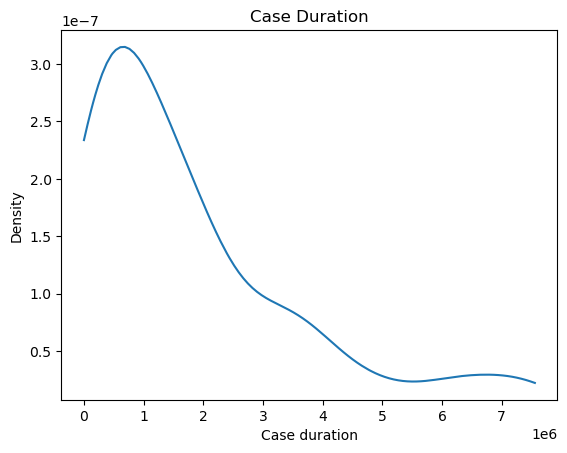

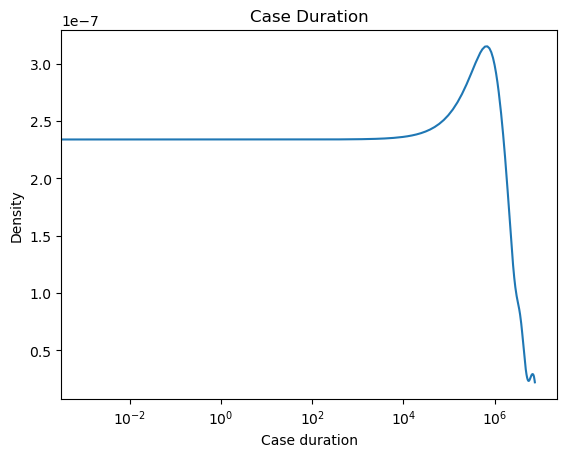

In [57]:
from pm4py.util import constants
from pm4py.statistics.traces.generic.log import case_statistics
x, y = case_statistics.get_kde_caseduration(log, parameters={constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "time:timestamp"})

from pm4py.visualization.graphs import visualizer as graphs_visualizer

gviz = graphs_visualizer.apply_plot(x, y, variant=graphs_visualizer.Variants.CASES)
graphs_visualizer.view(gviz)

gviz = graphs_visualizer.apply_semilogx(x, y, variant=graphs_visualizer.Variants.CASES)
graphs_visualizer.view(gviz)

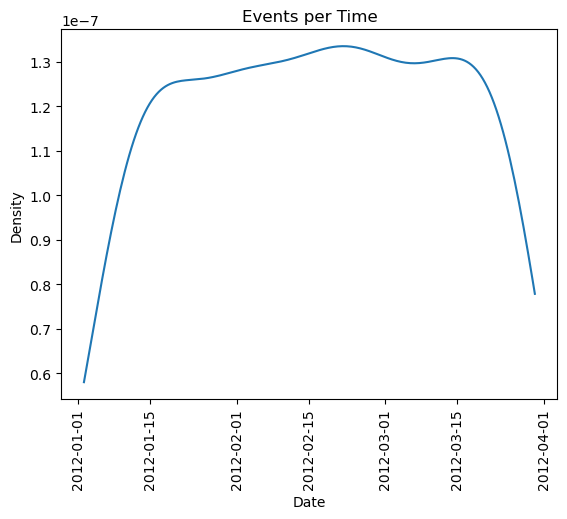

In [58]:
from pm4py.algo.filtering.log.attributes import attributes_filter

if __name__ == "__main__":
    x, y = attributes_filter.get_kde_date_attribute(log, attribute="time:timestamp")

    from pm4py.visualization.graphs import visualizer as graphs_visualizer

    gviz = graphs_visualizer.apply_plot(x, y, variant=graphs_visualizer.Variants.DATES)
    graphs_visualizer.view(gviz)

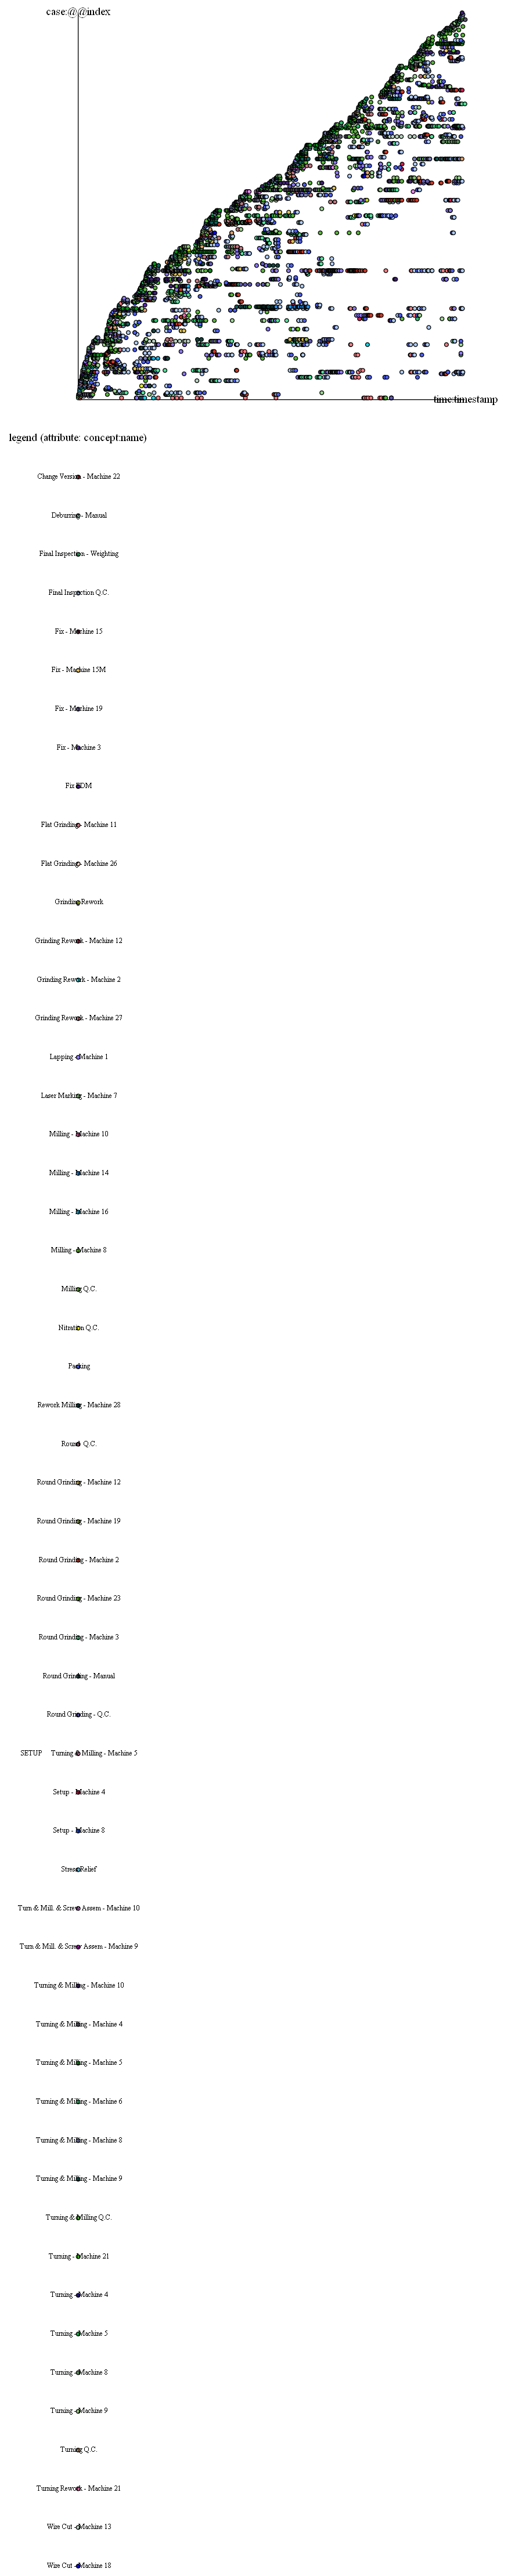

In [60]:
pm4py.view_dotted_chart(log, format="png")

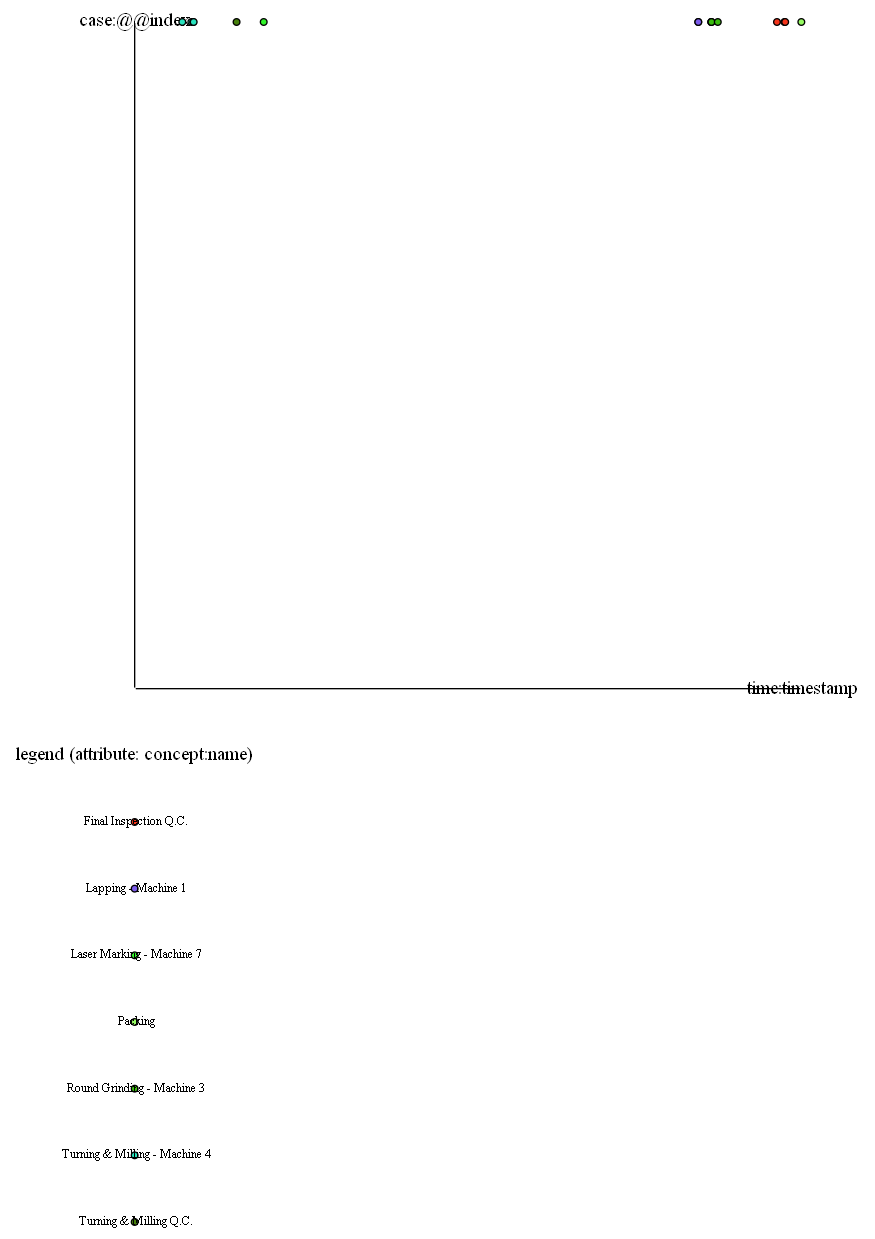

In [64]:
pm4py.view_dotted_chart(log, format="png")

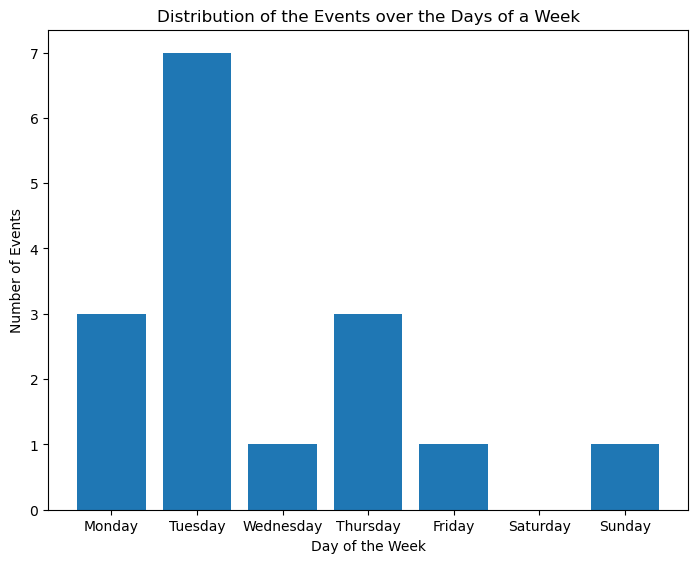

In [65]:
pm4py.view_events_distribution_graph(log, distr_type="days_week", format="png")